In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family']='serif'

In [5]:
K=8000
s=np.linspace(7000,9000,100)
h=np.maximum(s-K,0)


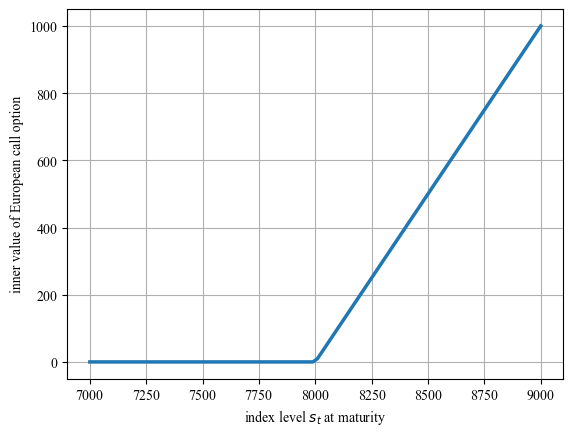

In [7]:
plt.figure()
plt.plot(s,h,lw=2.5)
plt.xlabel('index level $s_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.grid(True)

In [7]:
import math
import numpy as np
import pandas as pd
import statistics

import matplotlib as mpl
import matplotlib.pyplot as plt

In [1]:
import math

In [2]:
import numpy as np

In [3]:
kappa_r,theta_r,sigma_r,r0,T=0.3,0.04,0.1,0.04,1.0

In [4]:
def gamma(kappa_r,sigma_r):
    return math.sqrt(kappa_r**2+2*sigma_r**2)

In [5]:
def b1(alpha):
    kappa_r,theta_r,sigma_r,r0,T=alpha
    g=gamma(kappa_r,sigma_r)
    return (((2*g*math.exp((kappa_r+g)*T/2))/(2*g+(kappa_r+g)*(math.exp(g*T)-1)))**(2*kappa_r*theta_r/sigma_r**2))

In [6]:
import math

def b2(alpha):
    ''' Help Function. '''
    kappa_r, theta_r, sigma_r, r0, T = alpha
    g = (kappa_r ** 2 + 2 * sigma_r ** 2) ** 0.5  # 修正：原代码缺少平方根，CIR模型中g的定义是√(κ²+2σ²)
    return (2 * (math.exp(g * T) - 1)) / (2 * g + (kappa_r + g) * (math.exp(g * T) - 1))

def B(alpha):
    ''' Function to value unit zero-coupon bonds in Cox-Ingersoll-Ross (1985) model.
    Parameters
    ----------
    r0: float
        initial short rate
    kappa_r: float
        mean-reversion factor
    theta_r: float
        long-run mean of short rate
    sigma_r: float
        volatility of short rate
    T: float
        time horizon/interval
    Returns
    -------
    zcb_value: float
        zero-coupon bond present value
    '''
    # 从alpha中解包参数
    kappa_r, theta_r, sigma_r, r0, T = alpha
    # 计算b1（CIR模型中b1的公式：[2g(e^{gT}-1)] / [2g + (κ+g)(e^{gT}-1)] 对应的指数项）
    g = (kappa_r ** 2 + 2 * sigma_r ** 2) ** 0.5
    b1_numerator = 2 * g * math.exp( (kappa_r + g) * T / 2 )
    b1_denominator = 2 * g + (kappa_r + g) * (math.exp(g * T) - 1)
    b1 = (b1_numerator / b1_denominator) ** ( 2 * kappa_r * theta_r / (sigma_r ** 2) )
    # 计算b2
    b_2 = b2(alpha)
    # 返回零息债券现值：b1 * exp(-b2 * r0)
    return b1 * math.exp(-b_2 * r0)

if __name__ == '__main__':
    # 示例：定义CIR模型参数
    kappa_r = 2.0    # 均值回复因子
    theta_r = 0.05   # 长期利率均值
    sigma_r = 0.1    # 利率波动率
    r0 = 0.03        # 初始短期利率
    T = 5.0          # 债券期限（年）
    
    # 计算零息债券现值
    B0T = B( (kappa_r, theta_r, sigma_r, r0, T) )
    # 输出结果（保留4位小数）
    print("ZCB Value: {0:.4f}".format(B0T))

ZCB Value: 0.7868


In [1]:
import requests
from lxml import etree
import time

# 发起网络请求
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
}


def get_first_text(lst):
    """安全获取列表中的第一个元素"""
    try:
        return lst[0].strip()
    except:
        return ""


# 生成所有页面的URL
urls = ['https://movie.douban.com/top250?start={}&filter='.format(str(i * 25)) for i in range(10)]
count = 1  # 全局计数器，从1开始

for url in urls:
    #print(f"正在爬取: {url}")

    # 发送请求
    response = requests.get(url, headers=headers)
    html = response.text

    # 解析HTML
    parser = etree.HTMLParser(encoding='utf-8')
    tree = etree.HTML(html, parser=parser)

    # 获取所有电影列表项
    lis = tree.xpath('//ol[@class="grid_view"]/li')

    #print(f"本页找到 {len(lis)} 个电影")

    # 解析本页数据
    for li in lis:
    # 提取电影标题
            title = get_first_text(li.xpath('.//span[@class="title"][1]/text()'))

        # 提取电影链接
            src = get_first_text(li.xpath('.//div[@class="hd"]/a/@href'))

        # 提取导演和演员信息
            director_info = get_first_text(li.xpath('.//div[@class="bd"]/p[1]/text()'))

        # 提取评分
            score = get_first_text(li.xpath('.//span[@class="rating_num"]/text()'))

        # 提取评价人数
            comment = get_first_text(li.xpath('.//div[@class="star"]/span[4]/text()'))

        # 提取简介
            summary = get_first_text(li.xpath('.//span[@class="inq"]/text()'))

            print(count, title, src, director_info, score, comment, summary)
            count += 1

    # 添加延时，避免请求过快被封IP
    time.sleep(2)

1 肖申克的救赎 https://movie.douban.com/subject/1292052/ 导演: 弗兰克·德拉邦特 Frank Darabont   主演: 蒂姆·罗宾斯 Tim Robbins /... 9.7  
2 霸王别姬 https://movie.douban.com/subject/1291546/ 导演: 陈凯歌 Kaige Chen   主演: 张国荣 Leslie Cheung / 张丰毅 Fengyi Zha... 9.6  
3 泰坦尼克号 https://movie.douban.com/subject/1292722/ 导演: 詹姆斯·卡梅隆 James Cameron   主演: 莱昂纳多·迪卡普里奥 Leonardo... 9.5  
4 阿甘正传 https://movie.douban.com/subject/1292720/ 导演: 罗伯特·泽米吉斯 Robert Zemeckis   主演: 汤姆·汉克斯 Tom Hanks / ... 9.5  
5 千与千寻 https://movie.douban.com/subject/1291561/ 导演: 宫崎骏 Hayao Miyazaki   主演: 柊瑠美 Rumi Hîragi / 入野自由 Miy... 9.4  
6 美丽人生 https://movie.douban.com/subject/1292063/ 导演: 罗伯托·贝尼尼 Roberto Benigni   主演: 罗伯托·贝尼尼 Roberto Beni... 9.5  
7 星际穿越 https://movie.douban.com/subject/1889243/ 导演: 克里斯托弗·诺兰 Christopher Nolan   主演: 马修·麦康纳 Matthew Mc... 9.4  
8 这个杀手不太冷 https://movie.douban.com/subject/1295644/ 导演: 吕克·贝松 Luc Besson   主演: 让·雷诺 Jean Reno / 娜塔莉·波特曼 ... 9.4  
9 盗梦空间 https://movie.douban.com/subject/3541415/ 导演: 克里斯托弗·诺兰 Christopher Nolan   主演: 莱昂纳